# Predicting Water Quality in India

## Preprocessing

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
#print(os.listdir("input"))
data = pd.read_csv("input/water_dataX.csv", encoding= 'unicode_escape')

In [2]:
#conversions
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [3]:
#initialization
start=2
end=1779
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [4]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data. columns = ['station','location','state','do','ph','co','bod','na','tc', 'year']

In [5]:
#calulation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))

#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))


#calc of B.O.D.
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))


In [6]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wec']=data.nec* 0.009
data['wna']=data.nna * 0.028
data['wco']=data.nco * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco 
data = data.dropna()
data.head()

,station,location,state,do,ph,co,bod,na,tc,year,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.1,5330.0,2014,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.5,8443.0,2014,...,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.4,5500.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
5,1400,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.1,4049.0,2014,...,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
6,1476,"MANDOVI AT TONCA, MARCELA, GOA",GOA,6.1,6.7,308.0,1.4,0.3,5672.0,2014,...,100,0,100,9.9,28.10,23.40,0.00,2.8,11.24,75.44


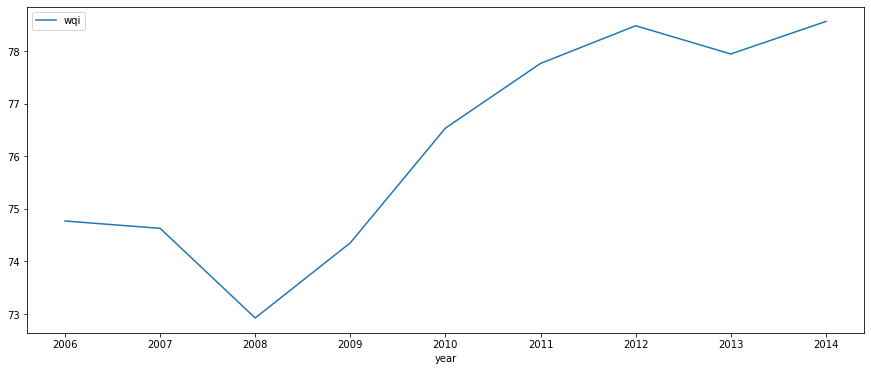

In [7]:
#calculation overall wqi for each year
ag=data.groupby('year')['wqi'].mean()

data_graph=ag.reset_index(level=0,inplace=False)

#plotting data
import matplotlib.pyplot as plt
data_graph=data_graph.set_index('year')
data_graph.plot(figsize=(15,6))
plt.show()

In [8]:
y = data['wqi']
x= data[['do', 'ph', 'co', 'bod', 'na', 'tc']]

## Model 1: Linear Regression

In [9]:
import numpy as np
from sklearn import metrics

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Score:',r2_score(y_test, y_pred))

Mean Absolute Error: 5.681186728606333
Mean Squared Error: 52.29395477794402
Root Mean Squared Error: 7.2314559238056635
R-squared Score: 0.6195036094775612


## Model 2: Regression Tree

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Score:',r2_score(y_test, y_pred))

Mean Absolute Error: 0.7503010033444973
Mean Squared Error: 6.346826755852843
Root Mean Squared Error: 2.51929092322678
R-squared Score: 0.9538198118285788


In [11]:
# trying a random forest

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Score:',r2_score(y_test, y_pred))

Mean Absolute Error: 0.7989311036789725
Mean Squared Error: 3.8040788730434834
Root Mean Squared Error: 1.9504047972263305
R-squared Score: 0.9723211165305441


In [31]:
# optimizing the decision tree using grid search

from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor()

grid = {
    'max_depth': [int(x) for x in np.linspace(1, 100, 50)],
    'min_samples_split': [int(x) for x in np.linspace(2, 100, 50)]
}

gridsearch = GridSearchCV(estimator=dt, param_grid=grid, scoring='r2', cv=10, verbose=1)
gridsearch.fit(X_train, y_train)

best_dt = gridsearch.best_estimator_
best_dt.fit(X_train, y_train)

y_pred = best_dt.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Score:',r2_score(y_test, y_pred))

Fitting 10 folds for each of 2500 candidates, totalling 25000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Mean Absolute Error: 0.7086287625418206
Mean Squared Error: 5.5693110367892995
Root Mean Squared Error: 2.3599387781866925
R-squared Score: 0.959477099098864


[Parallel(n_jobs=1)]: Done 25000 out of 25000 | elapsed:  3.1min finished


In [12]:
# optimizing the decision tree using grid search

from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

grid = {
    'n_estimators': [int(x) for x in np.linspace(1, 100, 25)],
    'max_depth': [int(x) for x in np.linspace(1, 25, 5)],
    'min_samples_split': [int(x) for x in np.linspace(2, 100, 25)]
}

gridsearch = GridSearchCV(estimator=rf, param_grid=grid, scoring='r2', cv=4, verbose=1)
gridsearch.fit(X_train, y_train)

best_rf = gridsearch.best_estimator_
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Score:',r2_score(y_test, y_pred))

Fitting 4 folds for each of 3125 candidates, totalling 12500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12500 out of 12500 | elapsed: 21.4min finished


Mean Absolute Error: 0.8203832183644991
Mean Squared Error: 4.114156140842039
Root Mean Squared Error: 2.028338270812351
R-squared Score: 0.9700649612697418


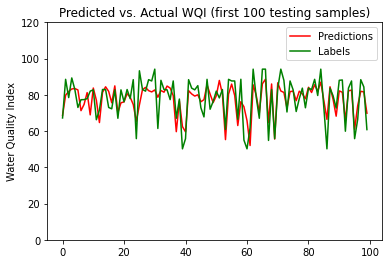

In [25]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

plt.ylim(0, 120)

plt.plot(y_pred[:100], color='red', label='Predictions')
plt.plot(y_test[:100], color='green', label='Labels')
plt.legend()

plt.title('Predicted vs. Actual WQI (first 100 testing samples)')
plt.ylabel('Water Quality Index')

plt.show()

## Model 3: Bayesian Ridge Regression

In [26]:
# Importing modeules that are required 
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
from sklearn.linear_model import BayesianRidge 
   
# Splitting dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
  
# Creating and training model 
model = BayesianRidge() 
model.fit(X_train, y_train) 
  
# Model making a prediction on test data 
y_pred = model.predict(X_test) 
    
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Score:',r2_score(y_test, y_pred))

Mean Absolute Error: 5.679963536521053
Mean Squared Error: 52.25824670769893
Root Mean Squared Error: 7.228986561593467
R-squared Score: 0.6197634252038429
